In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [3]:
penguins = pd.read_csv('penguins.csv')

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [5]:
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [6]:
penguins = penguins[~np.isnan(penguins).any(axis=1)]

In [7]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [9]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [10]:
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, X_train.columns)
])

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('model', clf)])



params_rf = {'model__max_depth': [3, 5, 10, 20],
             'model__min_samples_leaf': [3, 5, 10, 15]}

rf_gridsearch = GridSearchCV(model_pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'model__max_depth': 20, 'model__min_samples_leaf': 15}


In [11]:
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, X_train.columns)
])

clf = KNeighborsClassifier()

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('model', clf)])

params_rf = {'model__n_neighbors': range(1,15,1)}
rf_gridsearch = GridSearchCV(model_pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
knn_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 14 candidates, totalling 70 fits

Best hyperparameter: {'model__n_neighbors': 1}


In [12]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [13]:
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, X_train.columns)
])

clf = AdaBoostClassifier()

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('model', clf)])

params_rf = {'model__n_estimators': range(10,60,10),
            'model__learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]}
rf_gridsearch = GridSearchCV(model_pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
ab_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best hyperparameter: {'model__learning_rate': 0.1, 'model__n_estimators': 40}


In [14]:
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, X_train.columns)
])

clf1 = LogisticRegression(random_state=1, max_iter=4000)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('model', clf)])

params_rf = {'model__lr__C': [0.0001,0.001,0.01,0.1,1,10,100,1000], 'model__rf__n_estimators': range(55,110,5), 'model__voting': ['soft']}
rf_gridsearch = GridSearchCV(model_pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
voting_class_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 88 candidates, totalling 440 fits

Best hyperparameter: {'model__lr__C': 10, 'model__rf__n_estimators': 75, 'model__voting': 'soft'}


In [15]:
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, X_train.columns)
])

clf = DecisionTreeClassifier()

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('model', clf)])

params_rf = {'model__max_depth': [3, 5, 10, 20],
             'model__min_samples_leaf': [3, 5, 10, 15]}

rf_gridsearch = GridSearchCV(model_pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
dt_class_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'model__max_depth': 10, 'model__min_samples_leaf': 3}


In [16]:
num_preparation = Pipeline(steps=[
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, X_train.columns)
])

clf = LogisticRegression(solver='saga')

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('model', clf)])

params_rf = {'model__penalty': ('l1', 'l2', 'elasticnet', 'none'),
             'model__C': (0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 10, 100),
             'model__l1_ratio': (0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1)}
rf_gridsearch = GridSearchCV(model_pipeline,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
lr_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits

Best hyperparameter: {'model__C': 0.0001, 'model__l1_ratio': 0.0001, 'model__penalty': 'none'}


C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    #Checking the F1_score/AUC and summarizing 
    global metrics_dataframe
    
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric_ovr = roc_auc_score(y_checked, predictions_proba, multi_class='ovr')
    auc_metric_ovo = roc_auc_score(y_checked, predictions_proba, multi_class='ovo')
    
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},
                                                 ignore_index=True)

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))
    
    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
    return metrics_dataframe

In [18]:
def multi_roc(model, X_test, y_train, y_test, name):
    
    y_score = model.predict_proba(X_test)

    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    #provide number of target classes
    n_classes = 3 
    #provide names of target classes
    target_names = ['Species 1', 'Species 2', 'Species 3'] 

    from sklearn.preprocessing import LabelBinarizer

    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)
    
    from sklearn.metrics import RocCurveDisplay
    from sklearn.metrics import roc_curve, auc

    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

    from itertools import cycle

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            color=color,
            ax=ax,
        )
        
    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
    plt.legend()
    plt.show()
    
    return calculate_metrics(model, name, X_test, y_test)   
    

# RANDOM FOREST

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00


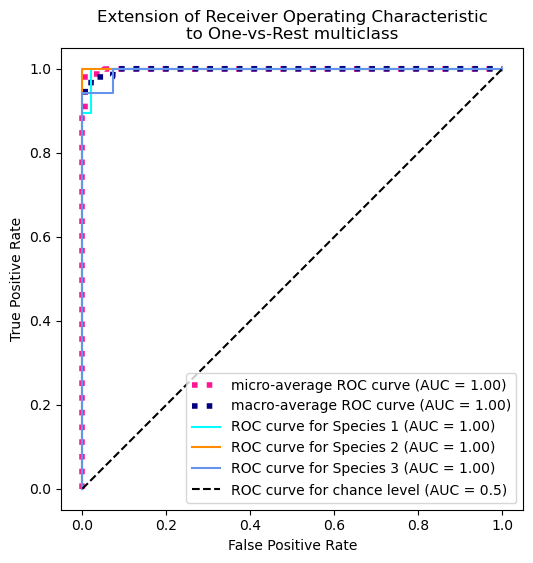

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        31
           2       1.00      0.94      0.97        17

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1643620519.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},


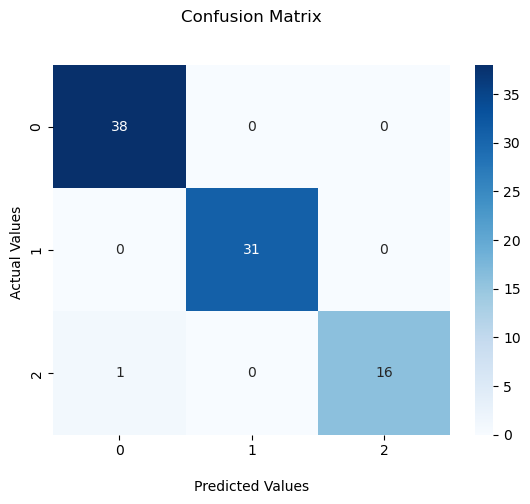

,Model,F1_score,AUC - One Vs Rest,AUC - One vs One
0,Random Forest,0.988271,0.997848,0.99762


In [19]:
multi_roc(model=rf_model_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Random Forest')

# KNN

Micro-averaged One-vs-Rest ROC AUC score:
0.98
Macro-averaged One-vs-Rest ROC AUC score:
0.99


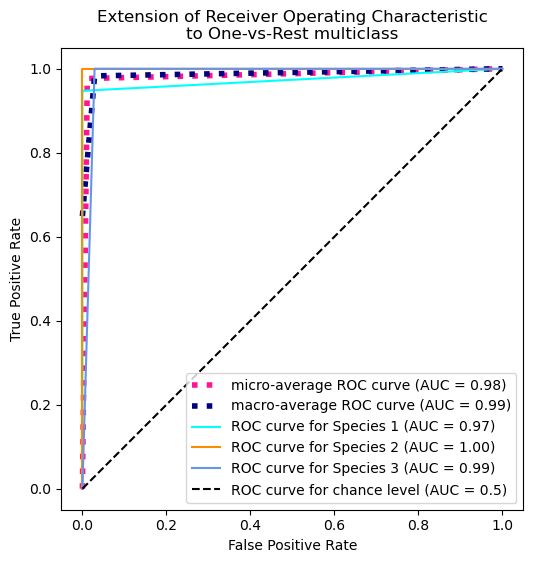

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       1.00      1.00      1.00        31
           2       0.89      1.00      0.94        17

    accuracy                           0.98        86
   macro avg       0.96      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86



C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1643620519.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},


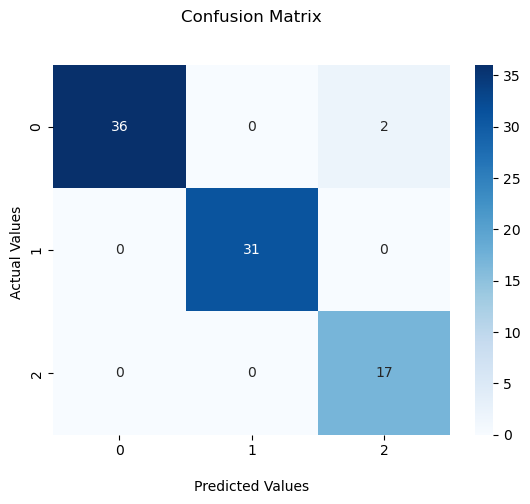

,Model,F1_score,AUC - One Vs Rest,AUC - One vs One
0,Random Forest,0.988271,0.997848,0.997620
1,KNN,0.977076,0.986397,0.986842


In [20]:
multi_roc(model=knn_model_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='KNN')

# ADA BOOST

Micro-averaged One-vs-Rest ROC AUC score:
0.99
Macro-averaged One-vs-Rest ROC AUC score:
0.99


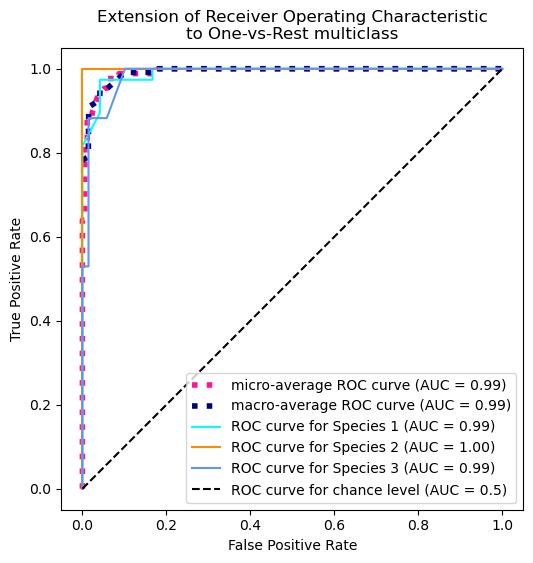

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       1.00      1.00      1.00        31
           2       0.79      0.88      0.83        17

    accuracy                           0.93        86
   macro avg       0.91      0.93      0.92        86
weighted avg       0.93      0.93      0.93        86



C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1643620519.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},


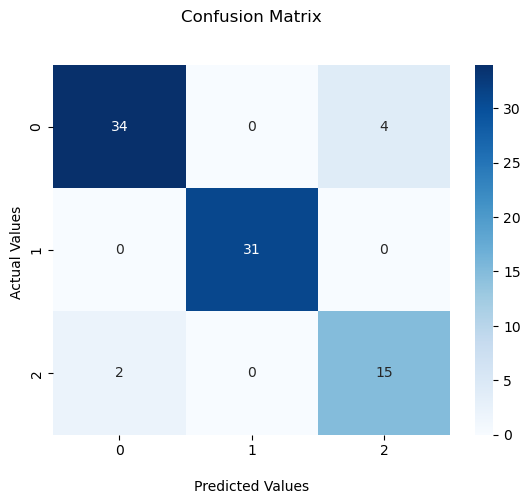

,Model,F1_score,AUC - One Vs Rest,AUC - One vs One
0,Random Forest,0.988271,0.997848,0.997620
1,KNN,0.977076,0.986397,0.986842
2,Ada Boost,0.931228,0.992062,0.991228


In [21]:
multi_roc(model=ab_model_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Ada Boost')

# VOTING CLASS

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00


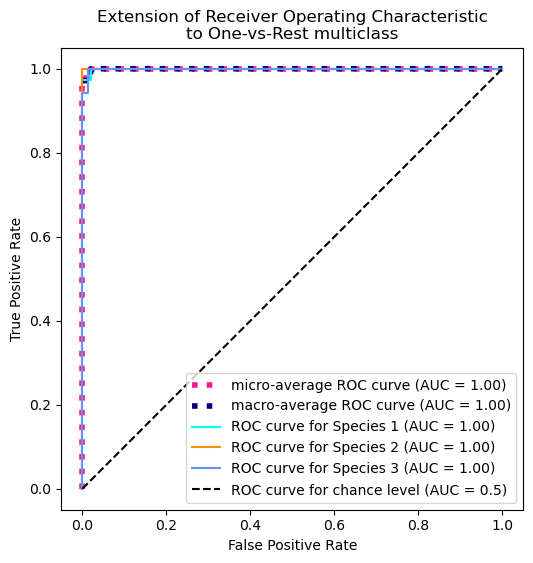

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       1.00      1.00      1.00        31
           2       0.94      0.94      0.94        17

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1643620519.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},


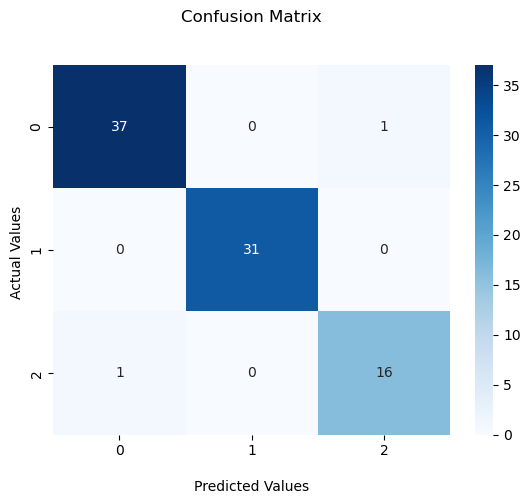

,Model,F1_score,AUC - One Vs Rest,AUC - One vs One
0,Random Forest,0.988271,0.997848,0.997620
1,KNN,0.977076,0.986397,0.986842
2,Ada Boost,0.931228,0.992062,0.991228
3,Voting Class,0.976744,0.999533,0.999484


In [22]:
multi_roc(model=voting_class_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Voting Class')

# DECISION TREE

Micro-averaged One-vs-Rest ROC AUC score:
0.99
Macro-averaged One-vs-Rest ROC AUC score:
0.98


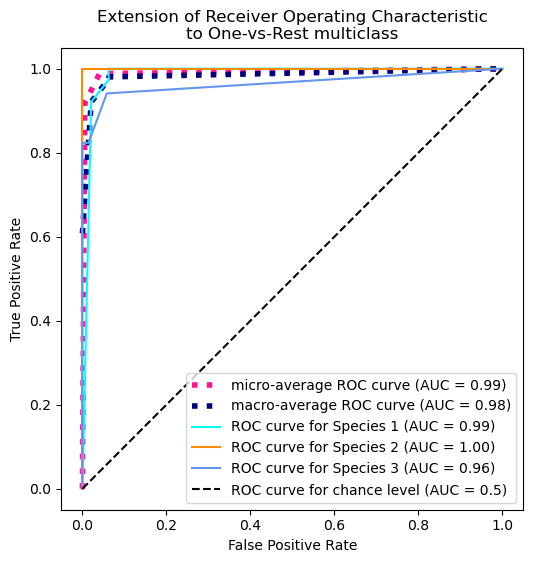

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       1.00      1.00      1.00        31
           2       0.93      0.82      0.87        17

    accuracy                           0.95        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.95      0.95      0.95        86



C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1643620519.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},


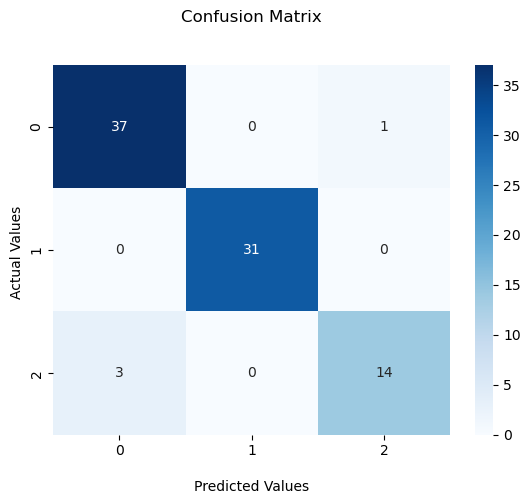

,Model,F1_score,AUC - One Vs Rest,AUC - One vs One
0,Random Forest,0.988271,0.997848,0.997620
1,KNN,0.977076,0.986397,0.986842
2,Ada Boost,0.931228,0.992062,0.991228
3,Voting Class,0.976744,0.999533,0.999484
4,Decision Tree,0.952631,0.983730,0.981982


In [23]:
multi_roc(model=dt_class_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Decision Tree')

# LOGISTIC REGRESSION

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
1.00


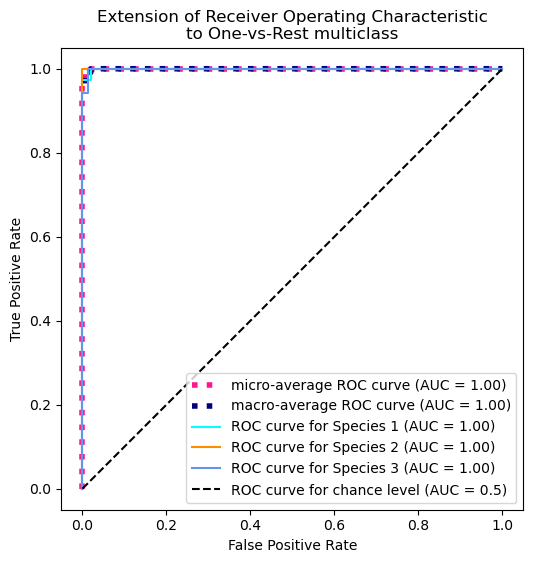

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        31
           2       0.94      1.00      0.97        17

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



C:\Users\Admin\AppData\Local\Temp\ipykernel_18508\1643620519.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC - One Vs Rest': auc_metric_ovr, 'AUC - One vs One': auc_metric_ovo},


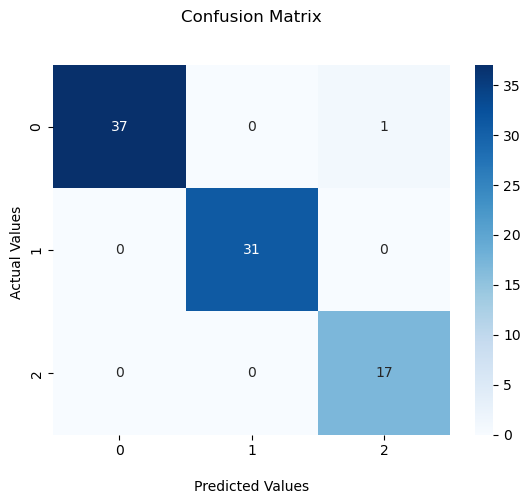

,Model,F1_score,AUC - One Vs Rest,AUC - One vs One
0,Random Forest,0.988271,0.997848,0.997620
1,KNN,0.977076,0.986397,0.986842
2,Ada Boost,0.931228,0.992062,0.991228
3,Voting Class,0.976744,0.999533,0.999484
4,Decision Tree,0.952631,0.983730,0.981982
5,Logistic Regression,0.988461,0.999533,0.999484


In [24]:
multi_roc(model=lr_model_v2, X_test=X_test, y_train=y_train, y_test=y_test, name='Logistic Regression')

# Wcześniejsze wyniki:

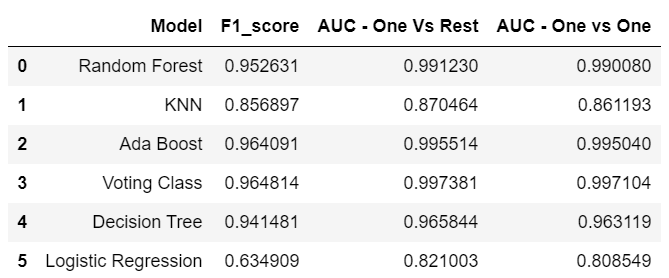

# Największa zmiana jest w logistic regression - wyniki sugerują, że dzięki PCA Logistic Regression jest w tym momencie najlepszym modelem z uwagi na separację klas i dokładność predykcji.

In [25]:
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
bike_data = bike_data_raw.drop(columns=["instant", "dteday"])

In [26]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


In [27]:
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
features = bike_data.drop(columns="rentals").columns
target = 'rentals'

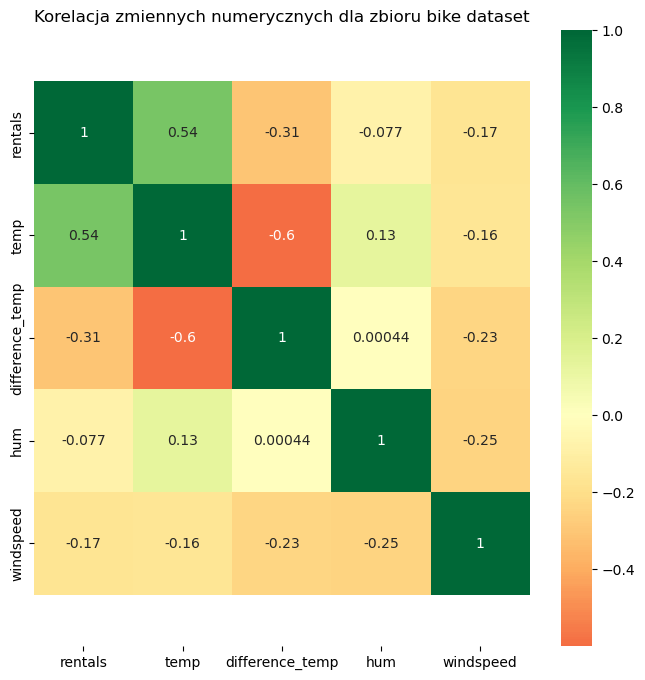

In [28]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [29]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [30]:
lr_model.score(X_test, y_test)

0.19412301357953687

In [31]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

In [32]:
linear_MAE = [mean_absolute_error(y_train, y_predict_train), mean_absolute_error(y_test, y_predict_test)]
linear_MAPE = [mean_absolute_percentage_error(y_train, y_predict_train), mean_absolute_percentage_error(y_test, y_predict_test)]
linear_MSE = [mean_squared_error(y_train, y_predict_train), mean_squared_error(y_test, y_predict_test)]
linear_RMSE = [sqrt(mean_squared_error(y_train, y_predict_train)), sqrt(mean_squared_error(y_test, y_predict_test))]

In [49]:
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler_1', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

dimension_reduction = Pipeline(steps=[

    ('pca', PCA())
    
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('pca', dimension_reduction, numeric_features+categorical_features)])

clf = ElasticNet(max_iter=2000)

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', clf)])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'preprocessor__pca__pca__n_components': [0.95, 0.9],
          'model__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'model__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")
y_predict_train = final_polynomial_regression_gridsearch
final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions_p1 = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions_p1))}')

C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver


Najlepsze hiperparametry: {'model__alpha': 10.0, 'model__l1_ratio': 1.0, 'preprocessor__num__polynomialfeatures__degree': 2, 'preprocessor__pca__pca__n_components': 0.9} 

RMSE: 463.6959823997197


In [50]:
y_predict_train = y_predict_train.predict(X_train)

In [51]:
poly_MAE = [mean_absolute_error(y_train, y_predict_train), mean_absolute_error(y_test, predictions_p1)]
poly_MAPE = [mean_absolute_percentage_error(y_train, y_predict_train),mean_absolute_percentage_error(y_test, predictions_p1)]
poly_MSE = [mean_squared_error(y_train, y_predict_train), mean_squared_error(y_test, predictions_p1)]
poly_RMSE = [sqrt(mean_squared_error(y_train, y_predict_train)), sqrt(mean_squared_error(y_test, predictions_p1))]

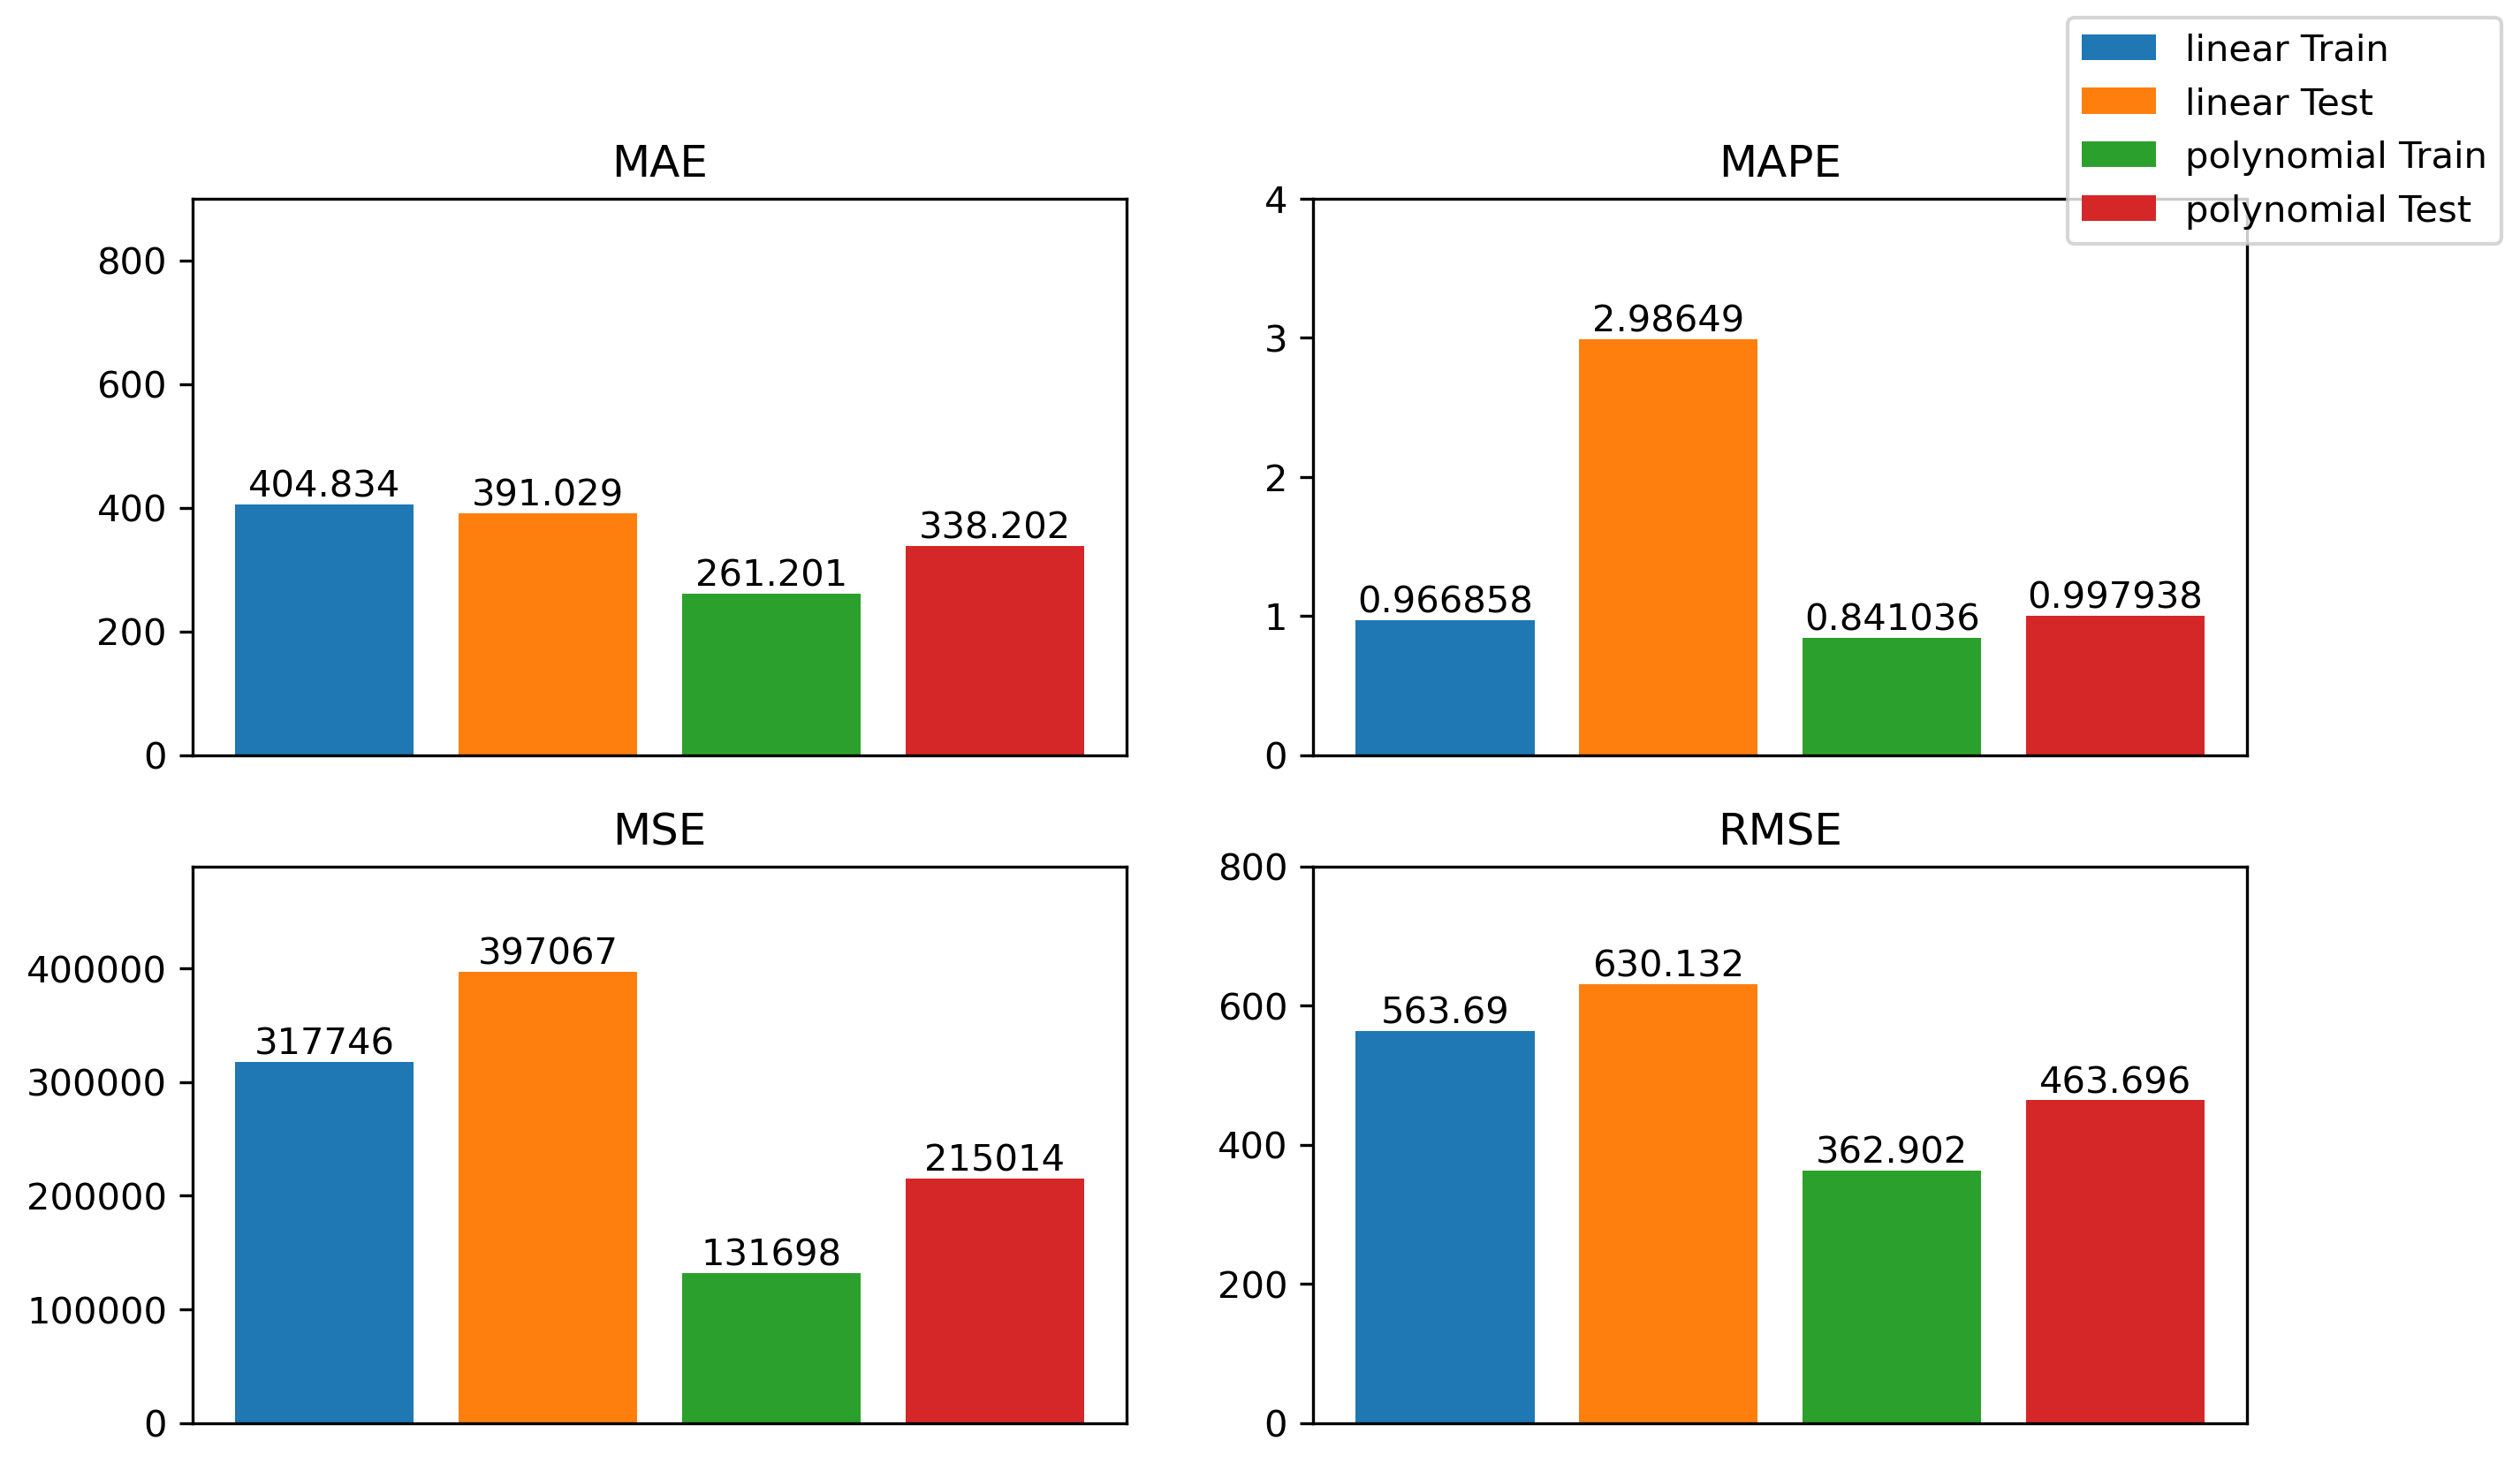

In [52]:
f = plt.figure(figsize=(10,6),dpi=300)

#1

axs1 = f.add_subplot(221)
axs1.title.set_text('MAE')
axs1.bar(1, linear_MAE[0], label='linear Train')
axs1.bar(2, linear_MAE[1], label='linear Test')
axs1.bar(3, poly_MAE[0], label='polynomial Train')
axs1.bar(4, poly_MAE[1], label='polynomial Test')
axs1.axis(ymin=0, ymax=900)
axs1.get_xaxis().set_visible(False)

for bars in axs1.containers:
    axs1.bar_label(bars)

#2

axs2 = f.add_subplot(222)
axs2.title.set_text('MAPE')
axs2.bar(1, linear_MAPE[0])
axs2.bar(2, linear_MAPE[1])
axs2.bar(3, poly_MAPE[0])
axs2.bar(4, poly_MAPE[1])
axs2.axis(ymin=0, ymax=4)
axs2.get_xaxis().set_visible(False)

for bars in axs2.containers:
    axs2.bar_label(bars)    

#3

axs3 = f.add_subplot(223)
axs3.title.set_text('MSE')
axs3.bar(1, linear_MSE[0])
axs3.bar(2, linear_MSE[1])
axs3.bar(3, poly_MSE[0])
axs3.bar(4, poly_MSE[1])
axs3.axis(ymin=0, ymax=4.9*10**5)
axs3.get_xaxis().set_visible(False)

for bars in axs3.containers:
    axs3.bar_label(bars)    

#4

axs4 = f.add_subplot(224)
axs4.title.set_text('RMSE')
axs4.bar(1, linear_RMSE[0])
axs4.bar(2, linear_RMSE[1])
axs4.bar(3, poly_RMSE[0])
axs4.bar(4, poly_RMSE[1])
axs4.axis(ymin=0, ymax=800)
axs4.get_xaxis().set_visible(False)

for bars in axs4.containers:
    axs4.bar_label(bars)   
    
    
f.legend()

# Wcześniejsze wyniki:
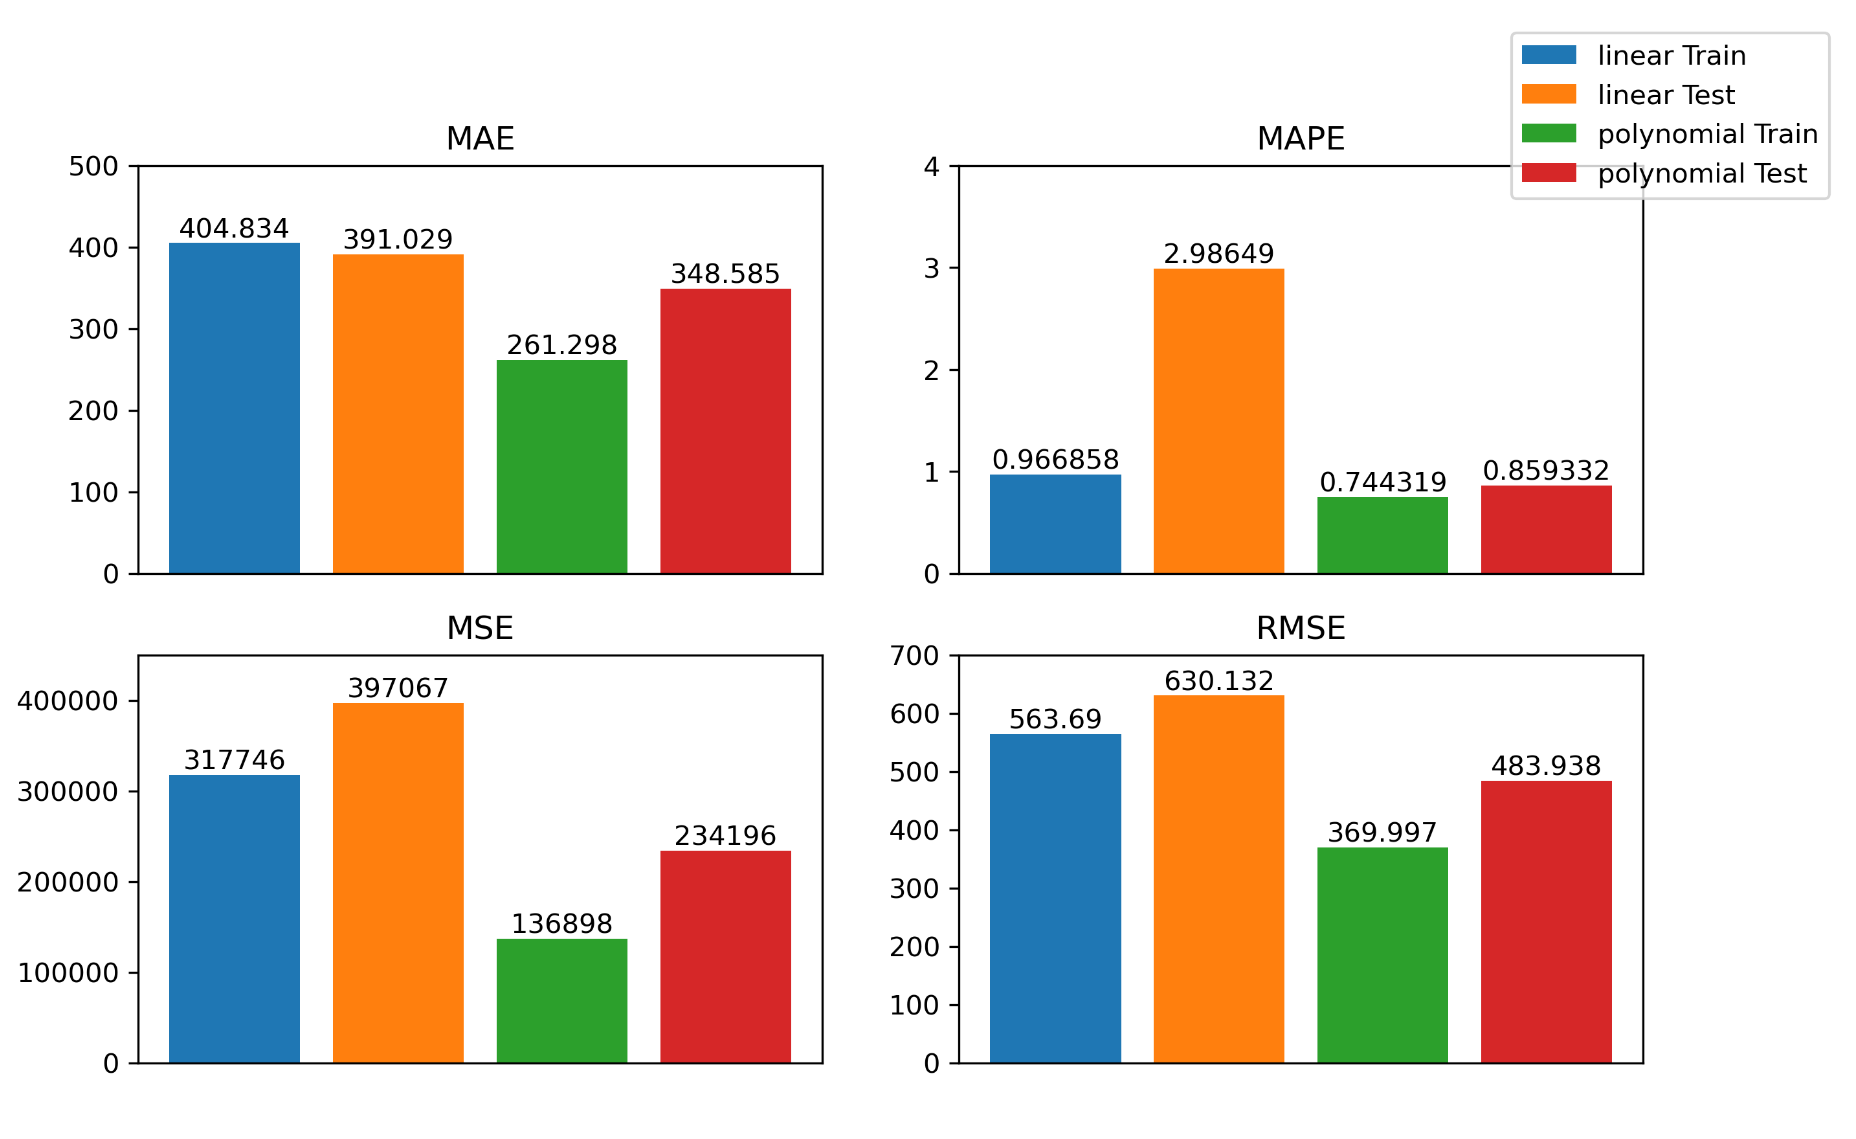

# Zastosowałem PCA na wszystkich features - wyniki lepsze dla Mean Absolute Error, Mean Squarred Error oraz Root Mean Squarred Error.